# Machine learning in Business Project

# Project description:

You work for the OilyGiant mining company. Your task is to find the best place for a new well.


# Project steps:

 **1. Download and prepare the data. Explain the procedure.**
 
 **2. Train and test the model for each region:**
 
    - Split the data into a training set and validation set at a ratio of 75:25.
    - Train the model and make predictions for the validation set.
    - Save the predictions and correct answers for the validation set.
    - Print the average volume of predicted reserves and model RMSE.
    - Analyze the results.
    
 **3. Prepare for profit calculation:**
 
    - Store all key values for calculations in separate variables.
    - Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
    - Provide the findings about the preparation for profit calculation step.

 **4. Write a function to calculate profit from a set of selected oil wells and model predictions:**
 
    - Pick the wells with the highest values of predictions.
    - Summarize the target volume of reserves in accordance with these predictions
    - Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
    
 **5. Calculate risks and profit for each region:**
 
    - Use the bootstrapping technique with 1000 samples to find the distribution of profit.
    - Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
    - Provide findings: suggest a region for development of oil wells and justify the choice.

# Data description:

**Geological exploration data for the three regions are stored in files:**
 - geo_data_0.csv
 - geo_data_1.csv
 - geo_data_2.csv
 - id — unique oil well identifier
 - f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
 - product — volume of reserves in the oil well (thousand barrels).

**Conditions:**
 - Only linear regression is suitable for model training (the rest are not sufficiently predictable).
 - When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
 - The budget for development of 200 oil wells is 100 USD million.
 - One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
 - After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
 
The data is synthetic: contract details and well characteristics are not disclosed.


In [1]:
#import all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Download and prepare the data.

In [16]:
try:
    df1 = pd.read_csv('/Users/yoheved/Desktop/Study/geo_data_0.csv')
except:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
df1.sample(10)

,id,f0,f1,f2,product
73950,pjA1T,-0.532809,0.940691,6.508783,127.133495
93877,tHaIF,1.595437,-0.168518,-4.041772,70.029854
65400,1hFCn,1.721884,-0.178856,4.506551,148.006562
97436,8ngRx,1.742858,-0.083408,2.904152,125.056271
42377,xrgzu,1.189263,-0.433491,0.205810,71.551038
45309,rPb84,-0.959980,0.719113,4.031168,30.250799
75776,Nvbjy,1.479175,-0.377978,6.995011,162.564594
75181,dcnYC,-0.070261,0.356007,-5.787352,55.220707
87096,lJdWO,1.178380,0.128460,2.625890,140.925917
16616,L26Fa,0.073766,1.198702,7.409773,142.800529


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
try:
    df2 = pd.read_csv('/Users/yoheved/Desktop/Study/geo_data_1.csv')
except:
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
df2.sample(10)

,id,f0,f1,f2,product
10175,Baoip,-9.658875,-10.215423,5.006531,137.945408
35851,iZkAJ,-5.943884,-0.919345,1.002481,30.132364
53836,csQIB,-8.572480,-8.180091,0.993002,30.132364
39860,E8u9S,7.942830,-0.870855,3.994422,107.813044
12361,NC7GY,-2.849126,-7.813312,3.003325,84.038886
37223,fwfG7,-6.315590,-12.077400,3.000013,84.038886
66293,wqety,1.787336,-1.251825,0.996989,26.953261
5705,9TQQQ,2.945842,-3.537750,2.996684,80.859783
12717,sK5rh,-8.410406,-1.404759,4.004005,110.992147
87969,NeyDp,-13.009008,-1.904032,4.005617,110.992147


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [20]:
try:
    df3 = pd.read_csv('/Users/yoheved/Desktop/Study/geo_data_2.csv')
except:
    df3 = pd.read_csv('/datasets/geo_data_2.csv')
df3.sample(10)

,id,f0,f1,f2,product
50766,0BOZ8,-0.476986,2.295739,-4.704936,76.699779
54815,Ar3Vg,-0.980551,0.519616,4.702160,99.480258
40710,YivMK,0.470621,2.749163,2.002154,79.452895
62270,TDloA,-1.723049,0.256970,1.443675,132.929548
50446,wyGzm,0.455312,2.099135,2.192939,122.704555
56510,Q0Lqp,1.243237,0.543882,1.792365,4.294230
709,rHmcs,0.314911,-0.258442,-8.831853,5.032557
49784,3meJD,-3.513360,0.800935,3.066761,145.667708
25011,qilUX,-1.277926,-0.517655,6.601103,151.978594
7570,aKbAz,0.783507,0.767527,3.958192,139.121726


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [22]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [23]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [24]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [26]:
df1.corr()    

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [27]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [28]:
df3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [14]:
def plt_corr(df, name):
    df.plot(kind='hexbin', x='f2', y='product', gridsize=40, title=name, sharex=False, figsize=(10, 8))
    plt.show()

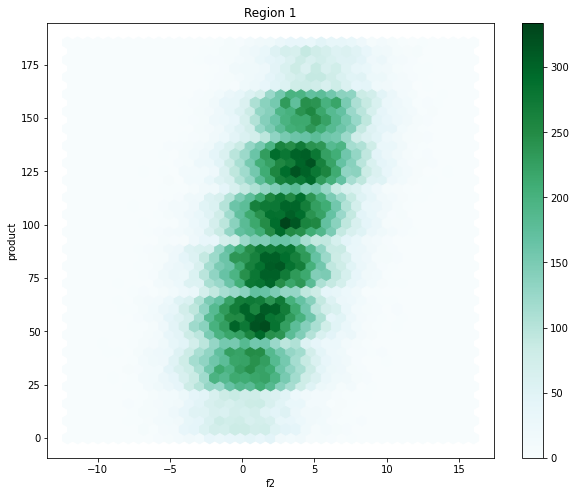

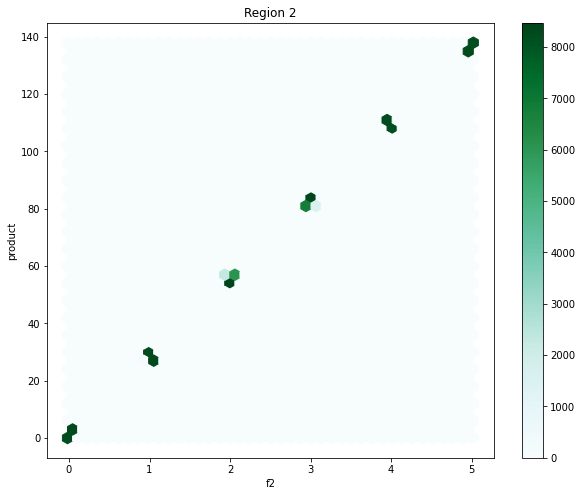

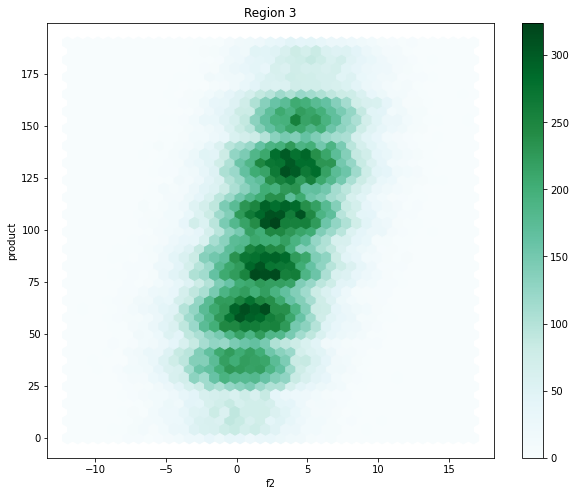

In [25]:
plt_corr(df1, 'Region 1')
plt_corr(df2, 'Region 2')
plt_corr(df3, 'Region 3')

In [29]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

In [30]:
df1.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [31]:
df2.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [32]:
df3.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


### Conclusion

We have 3 datasets for 3 regions. Each has 100000 rows and 5 columns. There are no missing values in datasets and all types of data are correct, so there is no need to convert any. Column "id" in each dataset won't be needed for any further work and may confuse our model, so i decided to drop it. Also after checking correlation we can see that there are pretty high correlation between f2 feature and product for each region.

## Train and test the model for each region:

###  Split the data into a training set and validation set at a ratio of 75:25.

In [33]:
target1 = df1['product']
features1 = df1.drop('product', axis=1)

In [34]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(features1, 
                                                                              target1,  
                                                                              test_size=0.25, 
                                                                              random_state=123)

In [43]:
print('Features 1:', features_train1.shape, features_valid1.shape)
print('Targets 1:', target_train1.shape, target_valid1.shape)

Features 1: (75000, 3) (25000, 3)
Targets 1: (75000,) (25000,)


In [44]:
target2 = df2['product']
features2 = df2.drop('product', axis=1)

In [45]:
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(features2, 
                                                                              target2,  
                                                                              test_size=0.25, 
                                                                              random_state=123)

In [46]:
print('Features 2:', features_train2.shape, features_valid2.shape)
print('Targets 2:', target_train2.shape, target_valid2.shape)

Features 2: (75000, 3) (25000, 3)
Targets 2: (75000,) (25000,)


In [47]:
target3 = df3['product']
features3 = df3.drop('product', axis=1)

In [48]:
features_train3, features_valid3, target_train3, target_valid3 = train_test_split(features3, 
                                                                              target3,  
                                                                              test_size=0.25, 
                                                                              random_state=123)

In [49]:
print('Features 3:', features_train3.shape, features_valid3.shape)
print('Targets 3:', target_train3.shape, target_valid3.shape)

Features 3: (75000, 3) (25000, 3)
Targets 3: (75000,) (25000,)


**Splitting for every region was done**

### Train the model and make predictions for the validation set.

In [50]:
def model_learn(region, df_features_train, df_features_valid, df_target_train, df_target_valid):
    
    global rmse, predictions_mean, predictions_reg
    
    model = LinearRegression().fit(df_features_train, df_target_train)
    predictions = model.predict(df_features_valid)
    predictions_mean = predictions.mean().round(2)
    rmse = ((mean_squared_error(df_target_valid, predictions)) ** 0.5).round(2)
    score = (r2_score(df_target_valid, predictions)).round(2)
    
    print(region)
    print('-----------------------------------------')
    print('Model predictions:')
    print('Average stock of predicted raw materials:', predictions_mean)
    print('RMSE:', rmse)
    print('R2-score:', score)
    
    predicted_valid = pd.Series(df_target_train.mean(), index=df_target_valid)
    mean_true = df_target_train.mean().round(2)
    rmse_true = ((mean_squared_error(df_target_valid, predicted_valid)) ** 0.5).round(2)
    
    print('-----------------------------------------')
    print('Mean:')
    print('Average stock:', mean_true)
    print('RMSE:', rmse_true)
    
    predictions_reg = pd.Series(predictions, index=df_target_valid.index)

### Save the predictions and correct answers for the validation set.

In [51]:
model_learn(
    'Region 1:', features_train1, features_valid1,
    target_train1, target_valid1)
rmse_reg1, predictions_reg1, predictions_mean_reg1 = rmse, predictions_reg, predictions_mean

Region 1:
-----------------------------------------
Model predictions:
Average stock of predicted raw materials: 92.55
RMSE: 37.65
R2-score: 0.28
-----------------------------------------
Mean:
Average stock: 92.38
RMSE: 44.41


In [52]:
model_learn(
    'Region 2:', features_train2, features_valid2,
    target_train2, target_valid2)
rmse_reg2, predictions_reg2, predictions_mean_reg2 = rmse, predictions_reg, predictions_mean

Region 2:
-----------------------------------------
Model predictions:
Average stock of predicted raw materials: 69.28
RMSE: 0.9
R2-score: 1.0
-----------------------------------------
Mean:
Average stock: 68.68
RMSE: 45.82


In [53]:
model_learn(
    'Region 3:', features_train3, features_valid3,
    target_train3, target_valid3)
rmse_reg3, predictions_reg3, predictions_mean_reg3 = rmse, predictions_reg, predictions_mean

Region 3:
-----------------------------------------
Model predictions:
Average stock of predicted raw materials: 95.1
RMSE: 40.13
R2-score: 0.19
-----------------------------------------
Mean:
Average stock: 95.04
RMSE: 44.67


###  Print the average volume of predicted reserves and model RMSE.

In [56]:
result = {
    'predictions_mean': [predictions_mean_reg1, predictions_mean_reg2, predictions_mean_reg3],
    'rmse_score': [rmse_reg1, rmse_reg2, rmse_reg3]
}
results = pd.DataFrame(data=result, index=('region 1', 'region 2', 'region 3')).style.highlight_max(color = 'lightgreen', axis = 0) 
results

,predictions_mean,rmse_score
region 1,92.550000,37.650000
region 2,69.280000,0.900000
region 3,95.100000,40.130000


### Conclusion:

We see that the model for the region 2 better predicts, the RMSE for it 0.90 but this region has the lowest stock of oil. While the biggest on in the 3 region.  

## Prepare for profit calculation:

### Store all key values for calculations in separate variables.

In [57]:
budget =  100e6
unit_revenue = 45e2

### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [58]:
print('Volume of reserves for developing new well without losses:', budget / unit_revenue / 200)
print('Average reserves in region 1:', df1['product'].mean())
print('Average reserves in region 2:', df2['product'].mean())
print('Average reserves in region 3:', df3['product'].mean())

Volume of reserves for developing new well without losses: 111.11111111111111
Average reserves in region 1: 92.50000000000001
Average reserves in region 2: 68.82500000000002
Average reserves in region 3: 95.00000000000004


### Conclusion.
As we see the reserves for non losses developing is 111.11. None of our regions doesn't have such volume in average. The most close region according to volume is 3 region. So let's see how our model will help us to find the new well for non losses developing.

## Write a function to calculate profit from a set of selected oil wells and model predictions:

In [59]:
def profit(predict, target):
    predictions_best_200 = predict.sort_values(ascending=False)
    target_best_200 = target[predictions_best_200.index][:200]
    rev = sum(target_best_200) * unit_revenue - budget
    return rev

## Calculate risks and profit for each region:

In [61]:
def bootstrap(prediction, target):
    
    state = np.random.RandomState(555)
    results = []
    global final_reg
    
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        prediction_subsample = prediction[target_subsample.index]
        results.append(profit(prediction_subsample, target_subsample))
    
    results = pd.Series(results)    
    results_mean = (results.mean() / 1e6).round(2)

    lower = (results.quantile(.025) / 1e6).round(2)
    upper = (results.quantile(.975) / 1e6).round(2)
    
    risk = (results < 0).mean() * 100
    
    final_reg = {
        'mean in mln.': results_mean,
        'lower in mln.': lower,
        'upper in mln.': upper,
        'risk': '{0:.1f}%'.format(risk)
    }

In [63]:
bootstrap(predictions_reg1, target_valid1)
final_reg1 = final_reg

In [64]:
bootstrap(predictions_reg2, target_valid2)
final_reg2 = final_reg

In [65]:
bootstrap(predictions_reg3, target_valid3)
final_reg3 = final_reg

In [66]:
results_final = final_reg1, final_reg2, final_reg3
results = pd.DataFrame(data=results_final, index=('region 1', 'region 2', 'region 3')).style.highlight_max(color = 'lightgreen', axis = 0) 
results

,mean in mln.,lower in mln.,upper in mln.,risk
region 1,5.020000,-0.450000,10.200000,3.7%
region 2,5.350000,1.310000,9.840000,0.7%
region 3,3.740000,-1.910000,9.330000,9.6%


# Conclusion.
We have 3 datasets for 3 regions. Each has 100000 rows and 5 columns. There are no missing values in datasets and all types of data are correct, so there is no need to convert any. Column "id" in each dataset won't be needed for any further work and may confuse our model, so i decided to drop it. Also after checking correlation we can see that there are pretty high correlation between f2 feature and product for each region. We see that the model for the region 2 better predicts, the RMSE for it 0.90 but this region has the lowest stock of oil. While the biggest on in the 3 region. 
As we see the reserves for non losses developing is 111.11. None of our regions doesn't have such volume in average. The most close region according to volume is 3 region. So let's see how our model will help us to find the new well for non losses developing.
After all calculations of profits according to predictions of our model we can see that the best region for developing new well is the second region. Model works very well and predicts almost perfect, it has the lowest risk of 0.7%, the highest average revenue - 5.35 mln USD and her lowest wells won't be losses ones.
